In [8]:
from models.direct.postDirect.RunPost import RunPost
from models.direct.postDirect.default import default
import os,glob

In [9]:
out_simula = ["output"]
join = os.path.join
sim_path = glob.glob(join(".." , "T05_simulation_direct", "output", "*"))
sim_path = [ os.path.basename(i).replace(".json","") for i in sim_path]

In [10]:
sim_path

['2024-08-27__14-34-08__99153',
 '2024-08-27__15-30-57__12407',
 '2024-08-28__09-47-40__67128',
 '2024-08-28__09-53-44__29585',
 '2024-08-28__10-01-17__89792',
 '2024-08-28__10-02-53__21217',
 '2024-08-28__10-07-00__81198',
 '2024-08-28__10-07-11__95771',
 '2024-08-28__10-08-22__17054',
 '2024-08-28__10-19-12__23261',
 '2024-08-28__10-29-13__56499',
 '2024-08-28__10-29-17__18900',
 '2024-08-28__10-29-39__33041',
 '2024-08-28__10-33-05__95607',
 '2024-08-28__11-02-57__69144',
 '2024-08-28__11-50-51__78844',
 '2024-08-28__14-11-00__70557',
 '2024-08-28__15-05-16__38917',
 '2024-08-28__16-21-19__47503',
 '2024-08-29__09-06-55__98984',
 '2024-08-29__09-35-02__12939',
 '2024-08-29__09-59-02__18062',
 '2024-08-29__09-59-19__65596',
 '2024-08-29__13-22-00__43720',
 '2024-08-29__13-22-08__81865',
 '2024-08-29__13-32-45__82707',
 '2024-08-29__13-51-41__70282',
 '2024-08-29__14-27-22__32943',
 '2024-08-29__14-58-19__53941',
 '2024-08-29__16-49-44__78073',
 '2024-08-29__17-22-53__59391',
 '2024-0

In [11]:
import numpy as np

In [12]:
params = default()
params["tensile_path"] = sim_path[-1]
params["max_mono"] = 142 # MPa


In [13]:
RunPost(params, out_simula)

Read frd
--------------------
Interp section
--------------------
Interpolating section


100%|██████████| 64/64 [00:00<00:00, 172.52it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 171.70it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 172.25it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 174.75it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 173.02it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 173.69it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 173.23it/s]


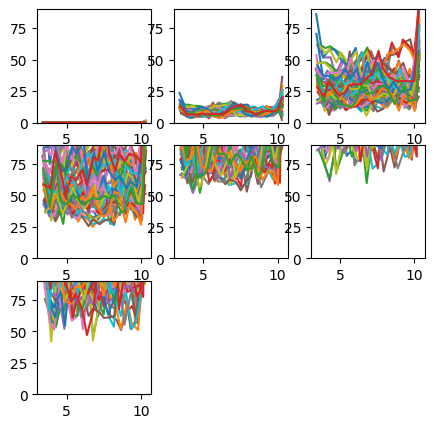

In [14]:
from matplotlib import pyplot as plt

nms = len(params["results"]["measurements"])
nnsqrt_plots = np.ceil(np.sqrt(nms))
# int 
nnsqrt_plots = int(nnsqrt_plots)
fig = plt.figure(figsize=(5, 5))


for i in range(nms):
    plt.subplot(nnsqrt_plots, nnsqrt_plots, i+1)
    mt = params["results"]["measurements"][i]["mt"]
    mt_z = params["results"]["measurements"][i]["mt_z"]
    for imt,imt_z in zip(mt,mt_z):
        plt.plot(imt_z, imt)

    plt.ylim(0,90)

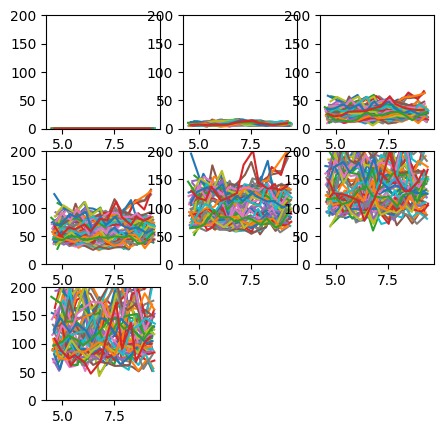

In [25]:
from matplotlib import pyplot as plt

nms = len(params["results"]["measurements"])
nnsqrt_plots = np.ceil(np.sqrt(nms))
# int 
nnsqrt_plots = int(nnsqrt_plots)
fig = plt.figure(figsize=(5, 5))


for i in range(nms):
    plt.subplot(nnsqrt_plots, nnsqrt_plots, i+1)
    mt = params["results"]["measurements"][i]["mt"]
    mt_z = params["results"]["measurements"][i]["mt_z"]
    for imt,imt_z in zip(mt,mt_z):
        plt.plot(imt_z[3:-3], imt[3:-3])

    plt.ylim(0,200)

In [59]:
steps = params["results"]["frd"]["steps"]
step_str =  [ i[:7 ] for i in steps ]
step_str = np.array(step_str)    
step_str_uq = np.unique(step_str)

indx = [ np.where(step_str == iuq )[-1][-1] for iuq in step_str_uq]


In [60]:
sigma_max = [i["sigma_max"] for i in params["results"]["measurements"]]
sigma_apl = [i["sigma"] for i in params["results"]["measurements"]]
epsilon = [i["epsilon"] for i in params["results"]["measurements"]]

In [61]:
sigma_max = np.array(sigma_max)
sigma_max = sigma_max[indx]
sigma_apl = np.array(sigma_apl)
sigma_apl = sigma_apl[indx]
epsilon = np.array(epsilon)
epsilon = epsilon[indx]

step_str_uq = step_str_uq[indx]

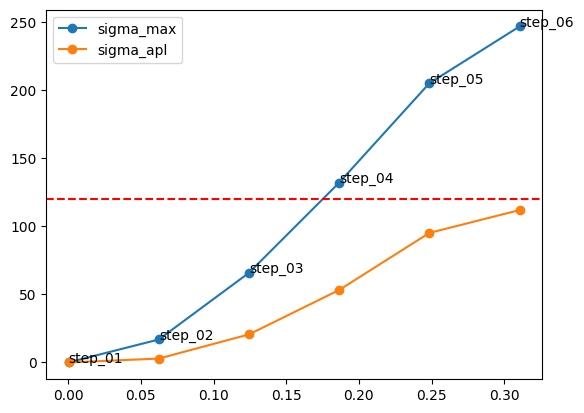

In [63]:
plt.plot(epsilon,sigma_max,label="sigma_max",marker="o")
plt.plot(epsilon,sigma_apl,label="sigma_apl",marker="o")
plt.legend()

# 120 MPa rotura trenzado 
s_rotura_trenzado = 120
# horizontal line
plt.axhline(y=s_rotura_trenzado, color='r', linestyle='--')

for i,isteps in enumerate(step_str_uq):
    plt.text(epsilon[i], sigma_max[i], str(isteps))

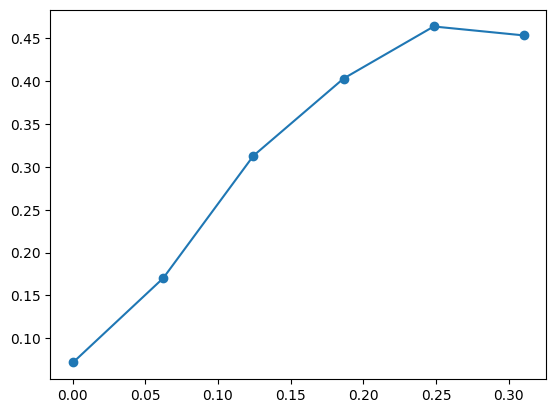

In [64]:
ratios = [ isigma_apl/isigma_max for isigma_max,isigma_apl in zip(sigma_max,sigma_apl)]

plt.plot(epsilon,ratios,label="ratios",marker="o")

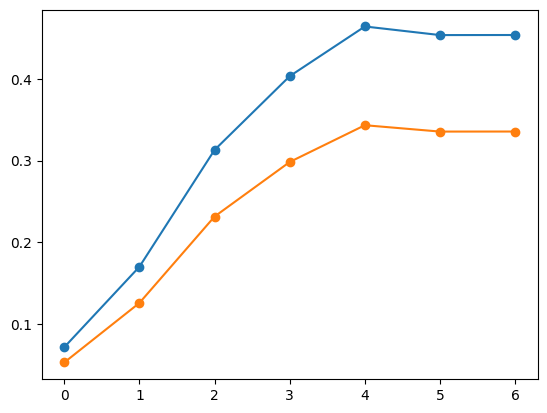

In [65]:
ratio = [i["ratio"] for i in params["results"]["measurements"]]
ratio_new = [i["ratio_new"] for i in params["results"]["measurements"]]

plt.plot(ratio,label="ratio",marker="o")
plt.plot(ratio_new,label="ratio_new",marker="o")

In [20]:
np.max(mt)

386.532137550772

In [21]:
imt[3:-3]

[112.2751634828447,
 100.3527928262647,
 67.61041267687114,
 137.1974546272138,
 90.66852971397797,
 171.89982547643237,
 112.0945835100253,
 67.94257397381458,
 47.082776761985905,
 67.44588492775685,
 79.68444391749337,
 73.51767712642497,
 88.39414819552177,
 109.06095537070574]

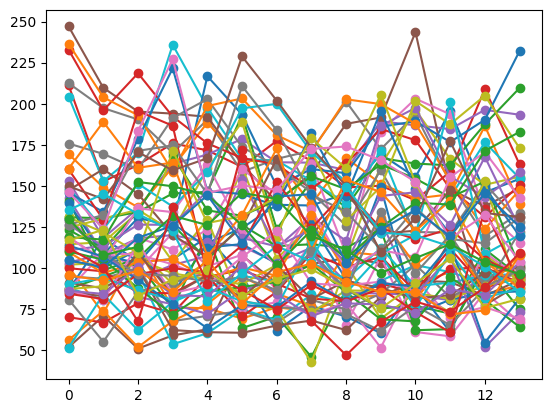

In [22]:
from matplotlib import pyplot as plt

fig = plt.figure()

for imt in mt:
    plt.plot(imt[3:-3],marker="o")

In [23]:
params["results"]["sigma_max"]

132.21151862417315

In [30]:
def ComputeStrength(F, D):
    # F in kg
    # D in mm
    A = np.pi*(D/2)**2
    F = F*9.81
    return F/A

In [ ]:
dia_hebra = 0.27 # mm
# 
F_hebra = 3.241 # kg
F_hebra = 9.81*F_hebra # N
A_hebra = np.pi*(dia_hebra/2)**2
sigma_hebra = F_hebra/A_hebra # MPa

In [84]:
F_trenzado = 177.667 # kg
F_trenzado = 9.81*F_trenzado # N
dia_trenzado = 4 # mm

# 4 monofilamentos x 16 + 15 monofilamentos en alma
theta = 80 # grados
ctheta = np.sin(np.deg2rad(theta))
Nalma = 15
Atrenzado = (ctheta*16*4 + Nalma)*np.pi*(dia_hebra/2)**2 
sigma_trenzado = F_trenzado/Atrenzado # MPa

# print with 2 decimals
print(f"sigma_trenzado = {sigma_trenzado:.2f} MPa")
print(f"sigma_hebra = {sigma_hebra:.2f} MPa")
# 
# ratio 
ratio = sigma_trenzado/sigma_hebra
print(f"ratio = {ratio:.3f}")

sigma_trenzado = 390.13 MPa
sigma_hebra = 555.30 MPa
ratio = 0.703


In [85]:
# Homogenizado trenzado
Atrenzado_hom = np.pi*(dia_trenzado/2)**2
sigma_trenzado_hom = F_trenzado/Atrenzado_hom # MPa
print(f"sigma_trenzado_hom = {sigma_trenzado_hom:.2f} MPa")

sigma_trenzado_hom = 138.70 MPa


In [86]:
#comparacion entre A hebra y A trenzado
print(f"A_trenzado_hom = {Atrenzado_hom:.2f} mm2")
print(f"A_trenzado = {Atrenzado:.2f} mm2")

A_trenzado_hom = 12.57 mm2
A_trenzado = 4.47 mm2


In [50]:
F_trenzado/(F_hebra*(64+15))


0.6939060065068211